In [21]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

t, r, k, a1, a2, m12, m21,  = symbols("t, r, k, a1, a2, m12, m21")
x = Function("x")
y = Function("y")

#Differential Equation 01, including:
# r = positive growth rate
# k1, k2 = Carrying Capacity of Patch 1 and Patch 2 respectively 
# a1 = percentage decrease due to human induced Allee Effects in patch 1
# a2 = percentage decrease due to environmental Allee Effects in patch 2
# m12, m21 = Migration from Patch 1 to 2 and 2 to 1 respectively

Patch_1 = Eq(diff(x(t), t), r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * y(t)))

Patch_2 = Eq(diff(y(t), t), r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) - (m12 * x(t)) + (m21 * y(t)))


solution= dsolve([Patch_1, Patch_2], [x(t), y(t)])
display(solution)



NotImplementedError: 

In [22]:
#Two Patch Coupled System of ODEs
DS1 = r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * x(t))
DS2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) - (m12 * y(t)) + (m21 * y(t))

#Finding the Equilibrium Values
Equilibrium= nonlinsolve([DS1,DS2], [x(t), y(t)])
display(Equilibrium)



{(0, 0), (0, a2/2 + k/2 - sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (0, a2/2 + k/2 + sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 - sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), 0), (a1/2 + k/2 - sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 - sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 - sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 + sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 + sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), 0), (a1/2 + k/2 + sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 - sqrt(r*(a2**2*r - 4*a2*k*m12 + 4*a2*k*m21 - 2*a2*k*r + k**2*r))/(2*r)), (a1/2 + k/2 + sqrt(r*(a1**2*r - 4*a1*k*m12 + 4*a1*k*m21 - 2*a1*k*r + k**2*r))/(2*r), a2/2 + k/2 + sqrt(r*(a2**2*r - 4*a2*k*m1

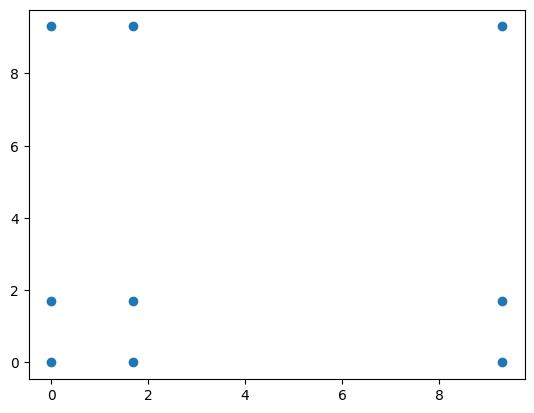

In [34]:
k=1
r=1
a1=10
a2=10
m12=0.6
m21=0.02

DS_1 = r * ((x(t)/a1) - 1) * ((1 - (x(t)/k)) * x(t)) - (m12 * x(t)) + (m21 * x(t))
DS_2 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k)) * y(t) - (m12 * y(t)) + (m21 * y(t))


Equilibrium= nonlinsolve([DS_1,DS_2], [x(t), y(t)])

Equilibrium_Values=list(Equilibrium)
#print(Equilibrium_Values)
#type(Equilibrium_Values)

x_val = (list(zip(*Equilibrium_Values))[0])
y_val = (list(zip(*Equilibrium_Values))[1])

scatter(x_val, y_val)


In [26]:

#Finding and plotting nullclines
0 = r * ((x(t)/a1) - 1) * ((1 - (x(t)/k1)) * x(t)) - (m12 * x(t)) + (m21 * x(t))
0 = r * ((y(t)/a2) - 1) * (1 - (y(t)/k2)) * y(t) - (m12 * y(t)) + (m21 * y(t))

plt.plot(x(t),y(t))

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (2652788692.py, line 2)

In [ ]:
func1 = np.array([DS1,DS2])
display(func1)

array([-m12*x(t) + m21*x(t) + r*(-1 + x(t)/a1)*(1 - x(t)/k1)*x(t),
       -m12*y(t) + m21*y(t) + r*(-1 + y(t)/a2)*(1 - y(t)/k2)*y(t)],
      dtype=object)